<a href="https://colab.research.google.com/github/RafsanJany-44/Research-NREM-REM/blob/main/Feature_Selection_ALL_O2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/krishnaik06/Feature-Selection-techniques/blob/master/Feature%20Selection.ipynb

https://www.youtube.com/watch?v=EqLBAmtKMnQ

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Research-NREM-REM/main/dataset/REM_NREM_O2.csv")
X = data.iloc[:,1:76] #independent columns
y = data[['Sleep_Stage']]   #target column 

In [3]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [4]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [5]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [6]:
featureScores

,Specs,Score
0,MeanP_Alpha_O2,1.913752
1,MedianF_Alpha_O2,218.817122
2,MeanF_Alpha_O2,333.296001
3,Spectral Edge_Alpha_O2,400.231243
4,PeakF_Alpha_O2,199.647720
5,MeanP_Beta_O2,1.333761
6,MedianF_Beta_O2,92.469710
7,MeanF_Beta_O2,26.265081
8,Spectral Edge_Beta_O2,16.158986
9,PeakF_Beta_O2,742.508011


In [7]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs       Score
9            PeakF_Beta_O2  742.508011
23  Spectral Edge_Gamma_O2  426.030573
3   Spectral Edge_Alpha_O2  400.231243
21        MedianF_Gamma_O2  367.954960
2           MeanF_Alpha_O2  333.296001
19          PeakF_Delta_O2  308.181624
22          MeanF_Gamma_O2  273.170152
1         MedianF_Alpha_O2  218.817122
17          MeanF_Delta_O2  203.247854
4           PeakF_Alpha_O2  199.647720


In [8]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(featureScores.nlargest(10,'Score'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


                     Specs       Score
9            PeakF_Beta_O2  742.508011
23  Spectral Edge_Gamma_O2  426.030573
3   Spectral Edge_Alpha_O2  400.231243
21        MedianF_Gamma_O2  367.954960
2           MeanF_Alpha_O2  333.296001
19          PeakF_Delta_O2  308.181624
22          MeanF_Gamma_O2  273.170152
1         MedianF_Alpha_O2  218.817122
17          MeanF_Delta_O2  203.247854
4           PeakF_Alpha_O2  199.647720


In [9]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.04934372 0.03760493 0.05168552 0.04326422 0.03280974 0.04710419
 0.04388586 0.04159956 0.04108355 0.03238476 0.05114736 0.04061785
 0.03611184 0.04244039 0.03224083 0.04271161 0.03288675 0.044658
 0.03972677 0.03007546 0.04664913 0.04084845 0.03809936 0.03920817
 0.02181197]


In [10]:
#plot graph of feature importances for better visualization
#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(10).plot(figsize=(20,10),kind="bar")
#plt.show()
#print(featureScores.nlargest(10,'Score'))

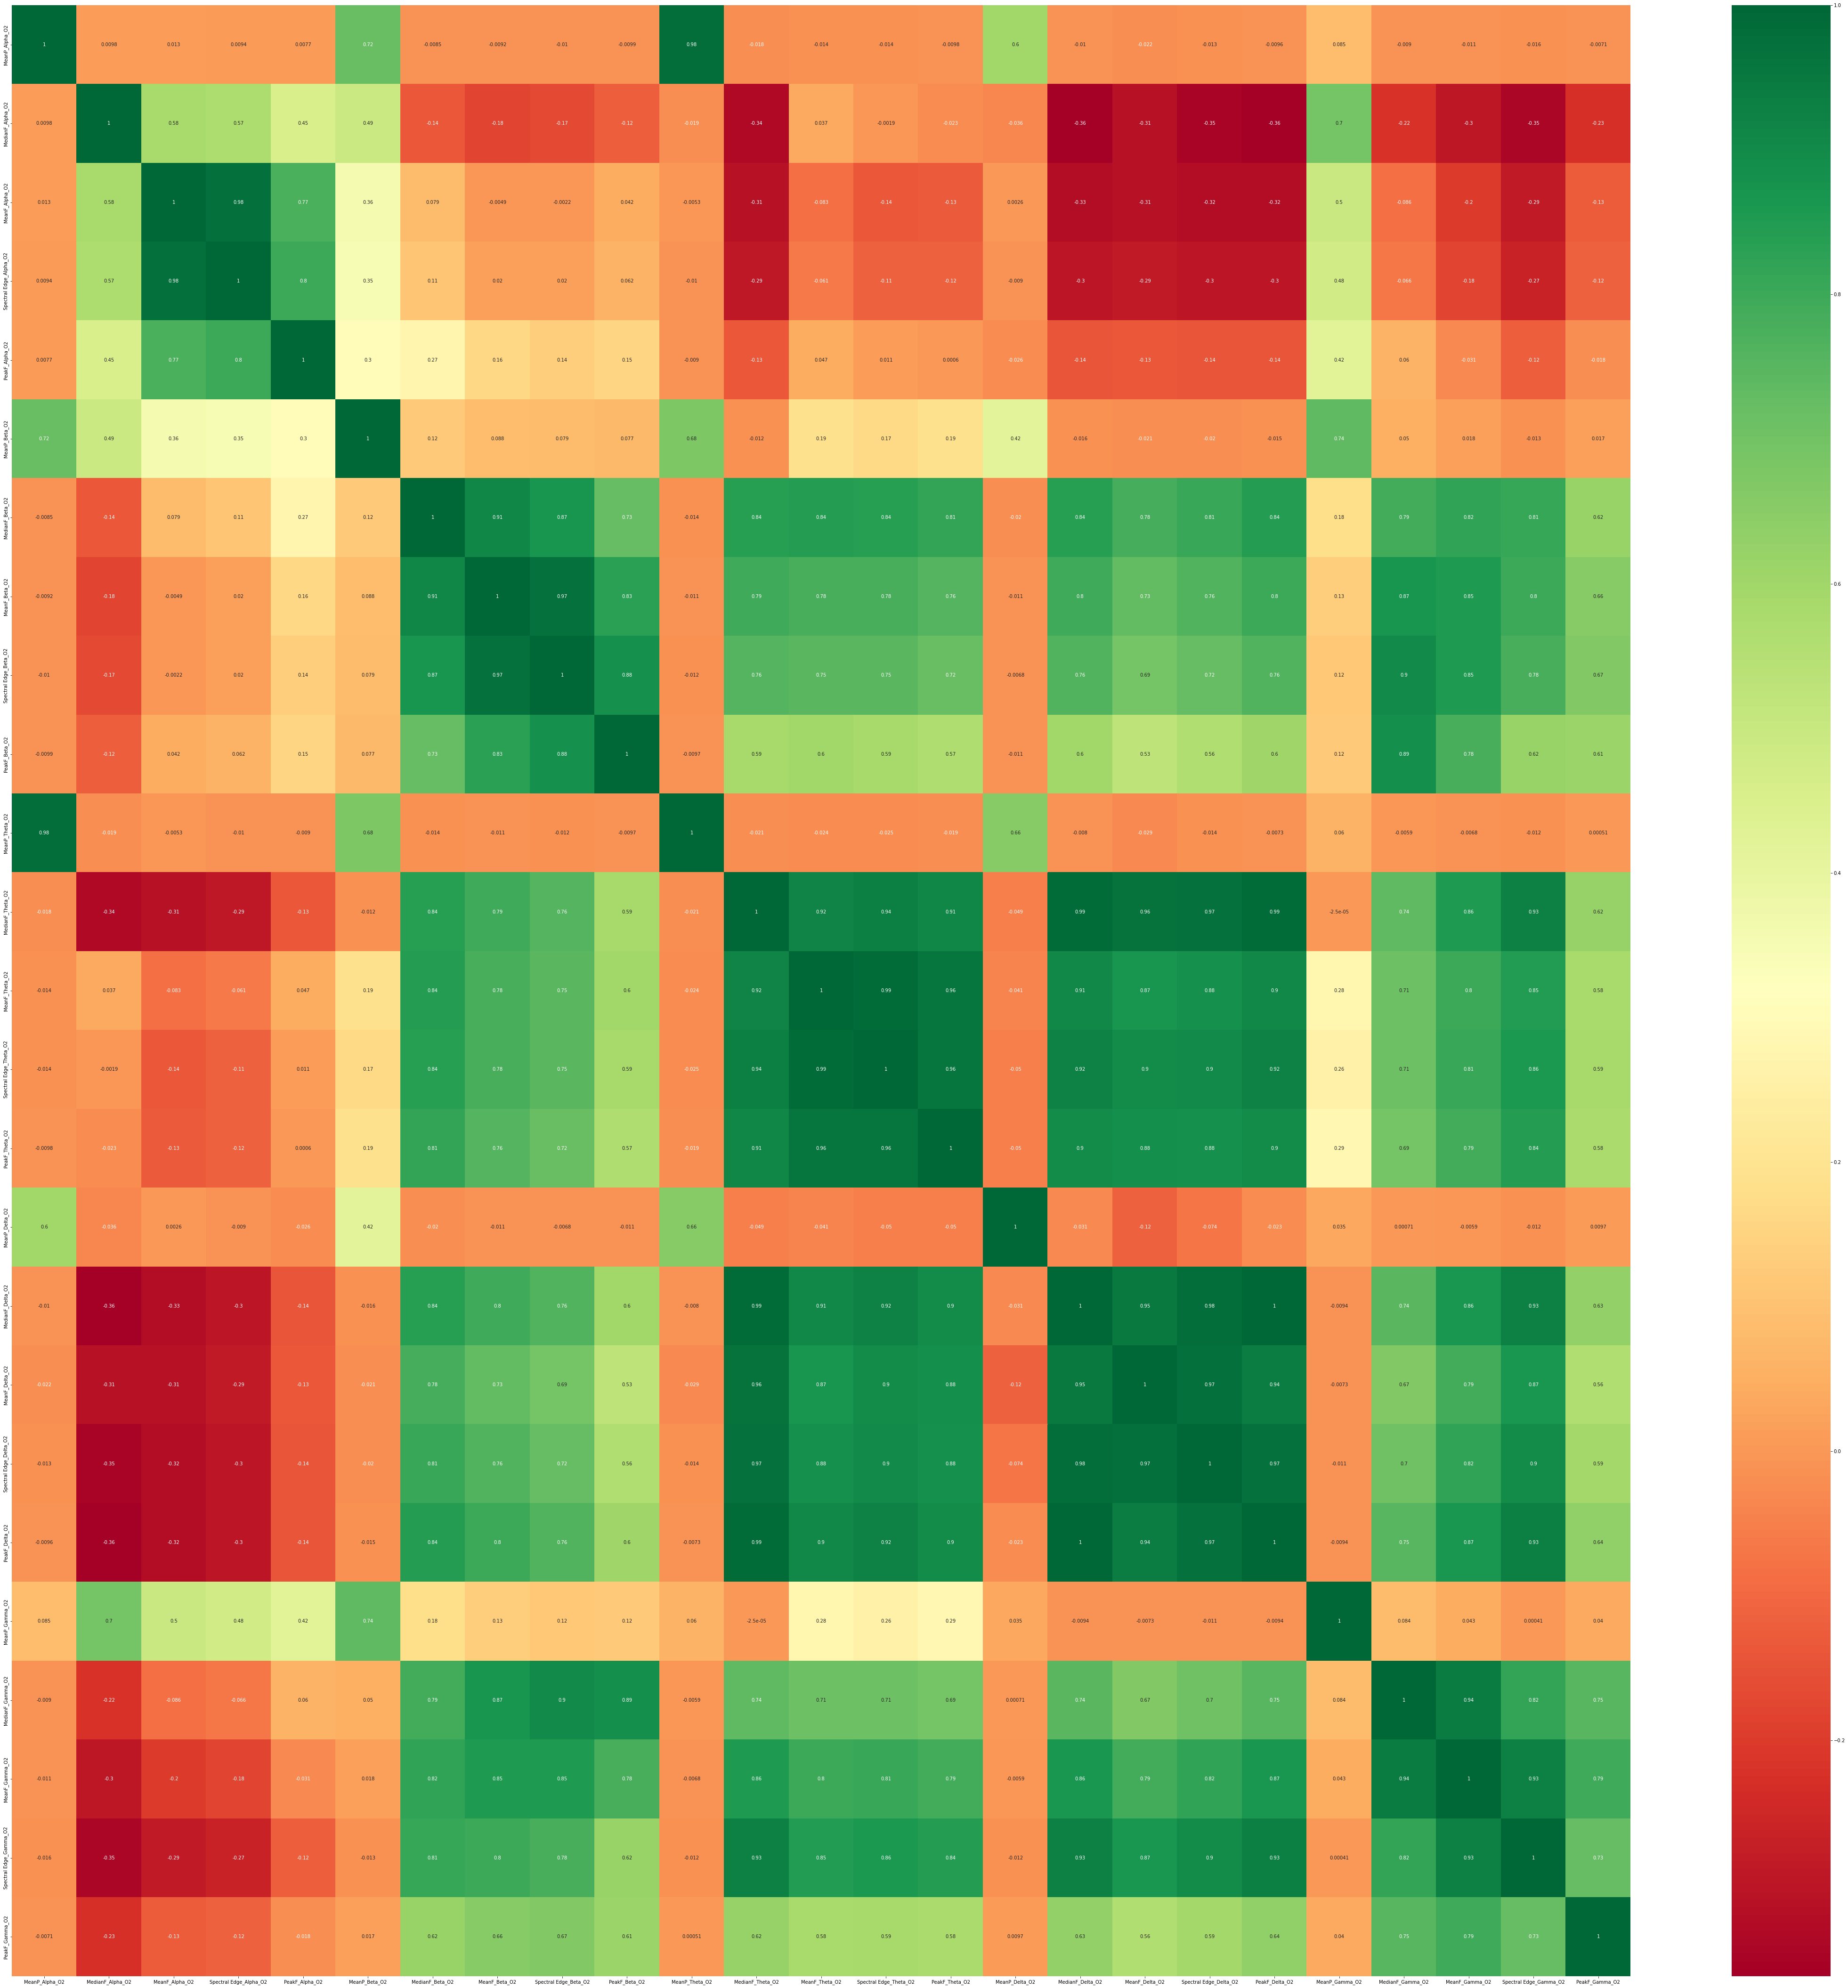

In [11]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(77,77))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

corr() is from panda and works on:
Method of correlation:

pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation